In [1]:
import os 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
DATA_DIR = "../data"

In [12]:
# Returns history of a field
# with shape
# (time_steps, field_size, num_of_particle_sizes)
def load_history(filename):
    path = os.path.join(DATA_DIR, filename)
    history = [[]]
    first_line = True
    idx = 0
    with open(path) as f:
        for line in f:
            if first_line:
                first_line = False
                field_size = int(line.strip())
                continue
            history[-1].append(
                list(map(float, line.strip().split()))
            )
            idx += 1
            if idx == field_size:
                idx = 0
                history.append([])
    history.pop()

    history = np.array(history)
    return history

In [26]:
history = load_history("history.txt")

In [27]:
history.shape, history.max(), history.min()

((501, 100, 100), 0.713503, -0.0718342)

## Animation

In [6]:
from IPython.display import HTML

In [7]:
def animate(history, min_value=None, max_value=None):
    if min_value is None:
        min_value = history_slice.min()
    if max_value is None:
        max_value = history_slice.max()
    
    z = np.transpose(history, (0, 2, 1))
    z_min = min_value
    z_max = max_value

    fps = 60

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    im = plt.imshow(z[0], cmap='Blues', interpolation='none', aspect='auto', vmin=z_min, vmax=z_max)

    def animate_func(i):
        im.set_array(z[i])
        return [im]

    anim = animation.FuncAnimation(
                fig, 
                animate_func, 
                frames = z.shape[0],
                interval = 1000 / fps, # in ms
    )

    return anim

def animate_slice(history, idx, min_value=None, max_value=None):
    history_slice = history[:, :, idx]
    if min_value is None:
        min_value = history_slice.min()
    if max_value is None:
        max_value = history_slice.max()
    
    z = history_slice
    z_min = min_value
    z_max = max_value

    fps = 60

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    im = plt.imshow(z[0].reshape(1, -1), cmap='Blues', interpolation='none', aspect='auto', vmin=z_min, vmax=z_max)

    def animate_func(i):
        im.set_array(z[i].reshape(1, -1))
        return [im]

    anim = animation.FuncAnimation(
                fig, 
                animate_func, 
                frames = z.shape[0],
                interval = 1000 / fps, # in ms
    )

    return anim

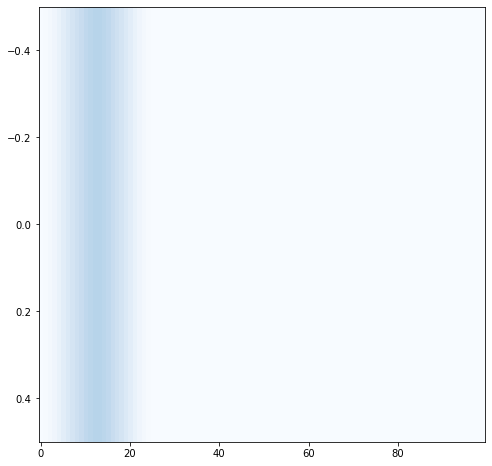

In [28]:
anim = animate_slice(history, 70, min_value=0, max_value=1)

In [29]:
HTML(anim.to_html5_video())

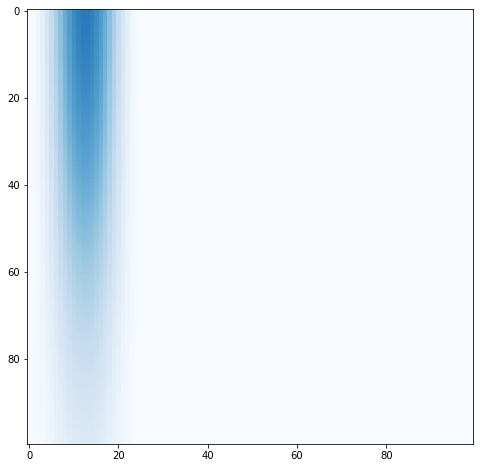

In [30]:
anim = animate(history, min_value=0, max_value=1)

In [31]:
HTML(anim.to_html5_video())

In [44]:
sizes = np.linspace(0.1, 1.0, num=history.shape[2])